В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [68]:
import pandas as pd
import numpy as np
%reload_ext autoreload
%autoreload 2
import sys
import os
modules_path = os.path.abspath("modules")
if modules_path not in sys.path:
    sys.path.append(modules_path)
from process_bank_churn import process_data


clients_df = pd.read_csv('csv/train.csv')

data = process_data(clients_df, True)



**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

Training time: 0.04 seconds
Train AUROC: 1.0000
Validation AUROC: 0.7671


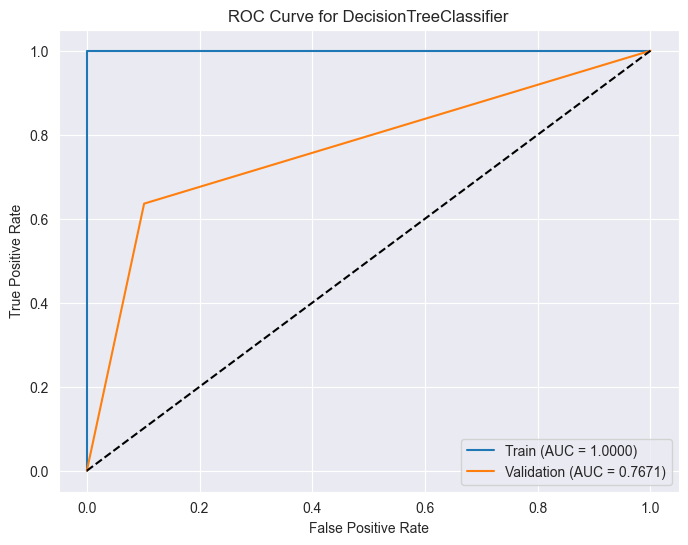

Model max depth: 25


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import time

start_time = time.time()
model = DecisionTreeClassifier(random_state=42)

model.fit(data['X_train'], data['train_targets'])
end_time = time.time()

print(f"Training time: {end_time - start_time:.2f} seconds")

# Compute probabilities
train_probs = model.predict_proba(data['X_train'])[:, 1]
val_probs = model.predict_proba(data['X_val'])[:, 1]

# Compute AUROC scores
train_auc = roc_auc_score(data['train_targets'], train_probs)
val_auc = roc_auc_score(data['val_targets'], val_probs)

print(f"Train AUROC: {train_auc:.4f}")
print(f"Validation AUROC: {val_auc:.4f}")

# Plot ROC Curves
def plot_roc_curve(y_true, y_probs, label):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_true, y_probs):.4f})')

plt.figure(figsize=(8,6))
plot_roc_curve(data['train_targets'], train_probs, "Train")
plot_roc_curve(data['val_targets'], val_probs, "Validation")

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for DecisionTreeClassifier")
plt.legend()
plt.show()

print('Model max depth:',model.tree_.max_depth)

Як бачимо, модель явно не "ОК".
Вона перетренована, б на тестових данних ми маємо помилку 0, а на валідаційних точність сильно падає.
Це може ставатися через те, що модель має занадто високу глибину.

Training time: 0.01 seconds
Train AUROC: 0.8499
Validation AUROC: 0.8420


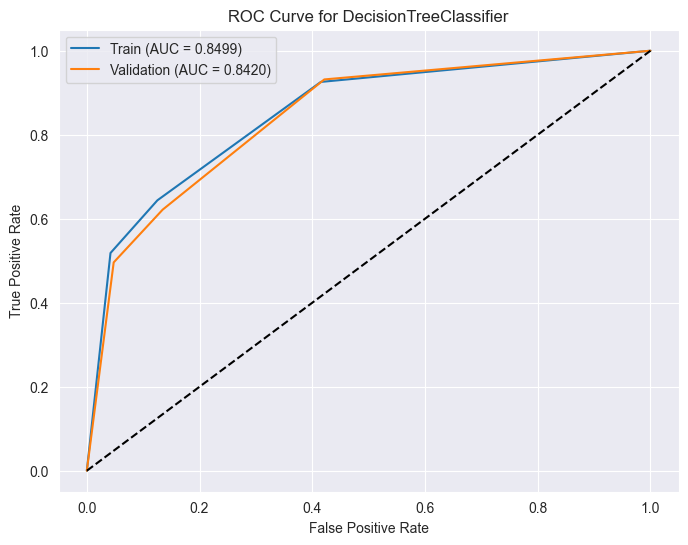

Model max depth: 2
              feature  importance
1                 Age    0.689506
4       NumOfProducts    0.310494
0         CreditScore    0.000000
2              Tenure    0.000000
3             Balance    0.000000
5           HasCrCard    0.000000
6      IsActiveMember    0.000000
7     EstimatedSalary    0.000000
8    Geography_France    0.000000
9   Geography_Germany    0.000000
10    Geography_Spain    0.000000
11      Gender_Female    0.000000
12        Gender_Male    0.000000


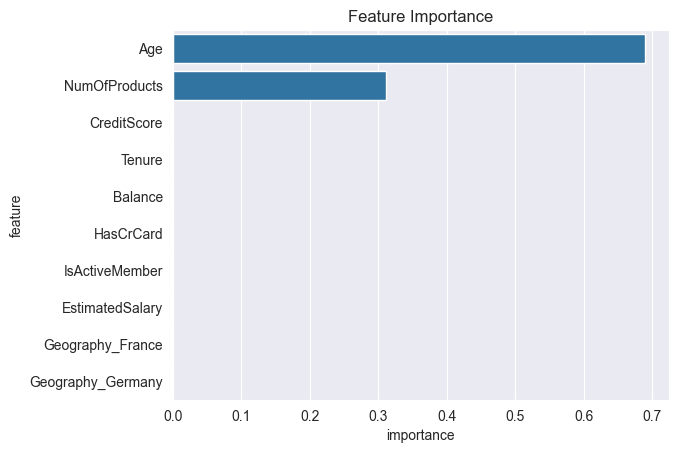

In [32]:
import seaborn as sns

start_time = time.time()
model_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42)

model_depth_2.fit(data['X_train'], data['train_targets'])
end_time = time.time()

print(f"Training time: {end_time - start_time:.2f} seconds")

# Compute probabilities
train_probs_depth_2 = model_depth_2.predict_proba(data['X_train'])[:, 1]
val_probs_depth_2 = model_depth_2.predict_proba(data['X_val'])[:, 1]

# Compute AUROC scores
train_auc_depth_2 = roc_auc_score(data['train_targets'], train_probs_depth_2)
val_auc_depth_2 = roc_auc_score(data['val_targets'], val_probs_depth_2)

print(f"Train AUROC: {train_auc:.4f}")
print(f"Validation AUROC: {val_auc:.4f}")

plt.figure(figsize=(8,6))
plot_roc_curve(data['train_targets'], train_probs_depth_2, "Train")
plot_roc_curve(data['val_targets'], val_probs_depth_2, "Validation")

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for DecisionTreeClassifier")
plt.legend()
plt.show()

print('Model max depth:',model.tree_.max_depth)

importance_df = pd.DataFrame({
    'feature': data['X_train'].columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(importance_df)

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

Training time: 0.02 seconds
Train AUROC: 0.9302
Validation AUROC: 0.9089


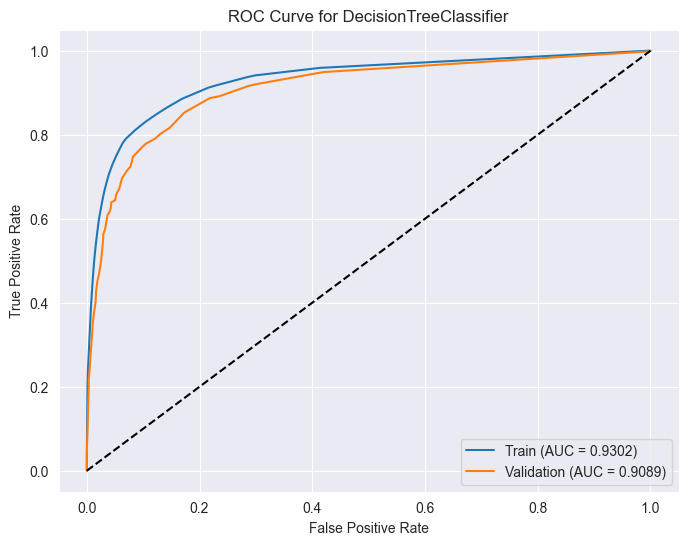

Model max depth: 2


In [52]:
start_time = time.time()
model_depth_manual = DecisionTreeClassifier(max_leaf_nodes=50 ,max_depth=20, random_state=42)

model_depth_manual.fit(data['X_train'], data['train_targets'])
end_time = time.time()

print(f"Training time: {end_time - start_time:.2f} seconds")

# Compute probabilities
train_probs_depth_manual = model_depth_manual.predict_proba(data['X_train'])[:, 1]
val_probs_depth_manual = model_depth_manual.predict_proba(data['X_val'])[:, 1]

# Compute AUROC scores
train_auc_depth_manual = roc_auc_score(data['train_targets'], train_probs_depth_manual)
val_auc_depth_manual = roc_auc_score(data['val_targets'], val_probs_depth_manual)

print(f"Train AUROC: {train_auc_depth_manual:.4f}")
print(f"Validation AUROC: {val_auc_depth_manual:.4f}")

plt.figure(figsize=(8,6))
plot_roc_curve(data['train_targets'], train_probs_depth_manual, "Train")
plot_roc_curve(data['val_targets'], val_probs_depth_manual, "Validation")

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for DecisionTreeClassifier")
plt.legend()
plt.show()

print('Model max depth:',model.tree_.max_depth)

importance_df = pd.DataFrame({
    'feature': data['X_train'].columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [53]:
start_time = time.time()
def max_depth_auroc(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(data['X_train'], data['train_targets'])

    train_probs = model.predict_proba(data['X_train'])[:, 1]
    val_probs = model.predict_proba(data['X_val'])[:, 1]
    train_auc = roc_auc_score(data['train_targets'], train_probs)
    val_auc = roc_auc_score(data['val_targets'], val_probs)

    return {'Max Depth': md, 'Training AUROC': train_auc, 'Validation AUROC': val_auc}

auroc_df = pd.DataFrame([max_depth_auroc(md) for md in range(1, 21)])

end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

auroc_df.style.background_gradient(subset='Validation AUROC', cmap='Blues_r')

Execution time: 0.60 seconds


,Max Depth,Training AUROC,Validation AUROC
0,1,0.759317,0.743540
1,2,0.849910,0.841988
2,3,0.901358,0.881561
3,4,0.914544,0.900325
4,5,0.927219,0.909810
5,6,0.936551,0.913054
6,7,0.943012,0.911707
7,8,0.951874,0.892131
8,9,0.961492,0.878672
9,10,0.972008,0.844271


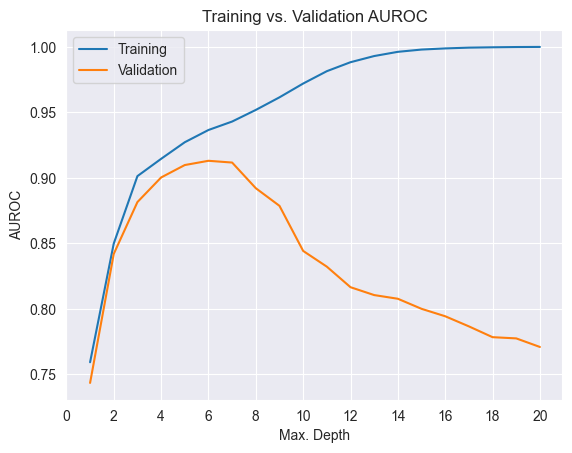

In [54]:
plt.figure()
plt.plot(auroc_df['Max Depth'], auroc_df['Training AUROC'])
plt.plot(auroc_df['Max Depth'], auroc_df['Validation AUROC'])
plt.title('Training vs. Validation AUROC')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('AUROC')
plt.legend(['Training', 'Validation']);

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [77]:
from process_bank_churn import process_new_data

clients_df_test = pd.read_csv('csv/test.csv')
new_data = process_new_data(clients_df_test, data['scaler'], data['encoder'])

model_depth_6 = DecisionTreeClassifier(max_depth=6, random_state=42)
model_depth_6.fit(data['X_train'], data['train_targets'])

test_predictions = model_depth_6.predict(new_data)
test_probs = model_depth_6.predict_proba(new_data)
threshhold_test_probs = (test_probs >= 0.5).astype(int)
exited_predictions = np.argmax(threshhold_test_probs, axis=1)

clients_df_test['Exited'] = exited_predictions

sample_submission_df = pd.read_csv('csv/sample_submission.csv')

merged_df = sample_submission_df.merge(
    clients_df_test[['id', 'Exited']],
    on='id',
    how='left'
)

merged_df = merged_df.drop(columns=['Exited_x'])
merged_df = merged_df.rename(columns={'Exited_y': 'Exited'})

merged_df.to_csv('csv/submission.csv', index=False)

merged_df

,id,Exited
0,15000,0
1,15001,0
2,15002,0
3,15003,1
4,15004,0
...,...,...
9995,24995,0
9996,24996,0
9997,24997,0
9998,24998,0
